In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer


In [27]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Axes: >

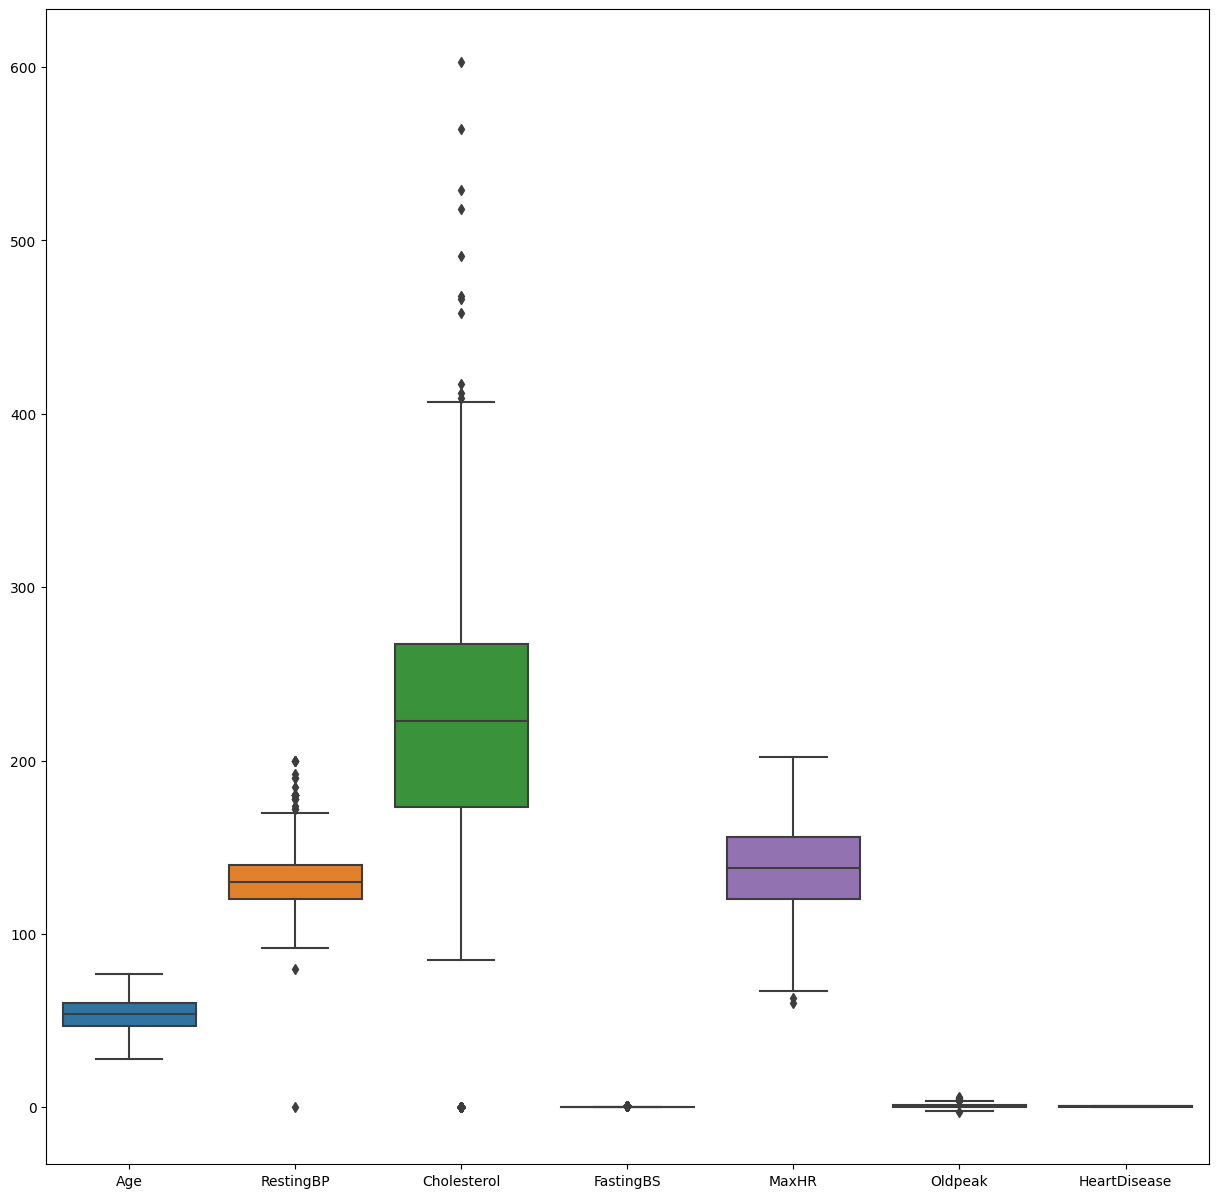

In [29]:
plt.figure(figsize=(15,15))
sns.boxplot(df)


In [30]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [31]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [32]:
df[df.Age>(df.Age.mean()+3*df.Age.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [33]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [34]:
df[df.MaxHR > (df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [35]:
column_names = []

for column, dtype in df.dtypes.items():
    print(f"Column: {column}, Data Type: {dtype}")
    if dtype == 'int64' or dtype == 'float64':
        column_names.append(column)


Column: Age, Data Type: int64
Column: Sex, Data Type: object
Column: ChestPainType, Data Type: object
Column: RestingBP, Data Type: int64
Column: Cholesterol, Data Type: int64
Column: FastingBS, Data Type: int64
Column: RestingECG, Data Type: object
Column: MaxHR, Data Type: int64
Column: ExerciseAngina, Data Type: object
Column: Oldpeak, Data Type: float64
Column: ST_Slope, Data Type: object
Column: HeartDisease, Data Type: int64


In [36]:
column_names

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [37]:
for i in column_names:
    valor = df[df[i] > (df[i].mean()+3*df[i].std())]
    print('=='*32)
    print(valor)
    print(i)
    

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
Age
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190          241          0     Normal   
241   54   M           ASY        200          198          0     Normal   
365   64   F           ASY        200            0          0     Normal   
399   61   M           NAP        200            0          1         ST   
592   61   M           ASY        190          287          1        LVH   
732   56   F           ASY        200          288          1        LVH   
759   54   M           ATA        192          283          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
109    106              N      0.0       Up             0  
241    142              Y      2.0     Flat             1  
365    140              Y      1.0     Flat

In [38]:
df.shape

(918, 12)

In [39]:
df1 = df[df.RestingBP<=(df.RestingBP.mean()+3*df.RestingBP.std())]
df2 = df1[df1.Cholesterol <= (df1.Cholesterol.mean()+3*df.Cholesterol.std())]
df3 = df2[df2.Oldpeak <= (df2.Oldpeak.mean()+3*df2.Oldpeak.std())]

df3.shape

(902, 12)

<Axes: >

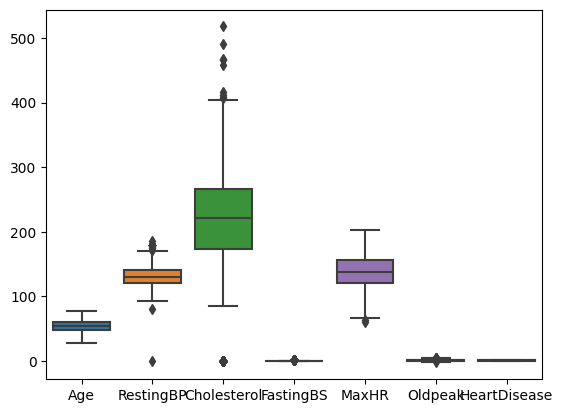

In [40]:
sns.boxplot(df3)

In [41]:
df3.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [42]:
df3 = pd.get_dummies(df3, drop_first=True, dtype=int)

In [46]:
df3

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


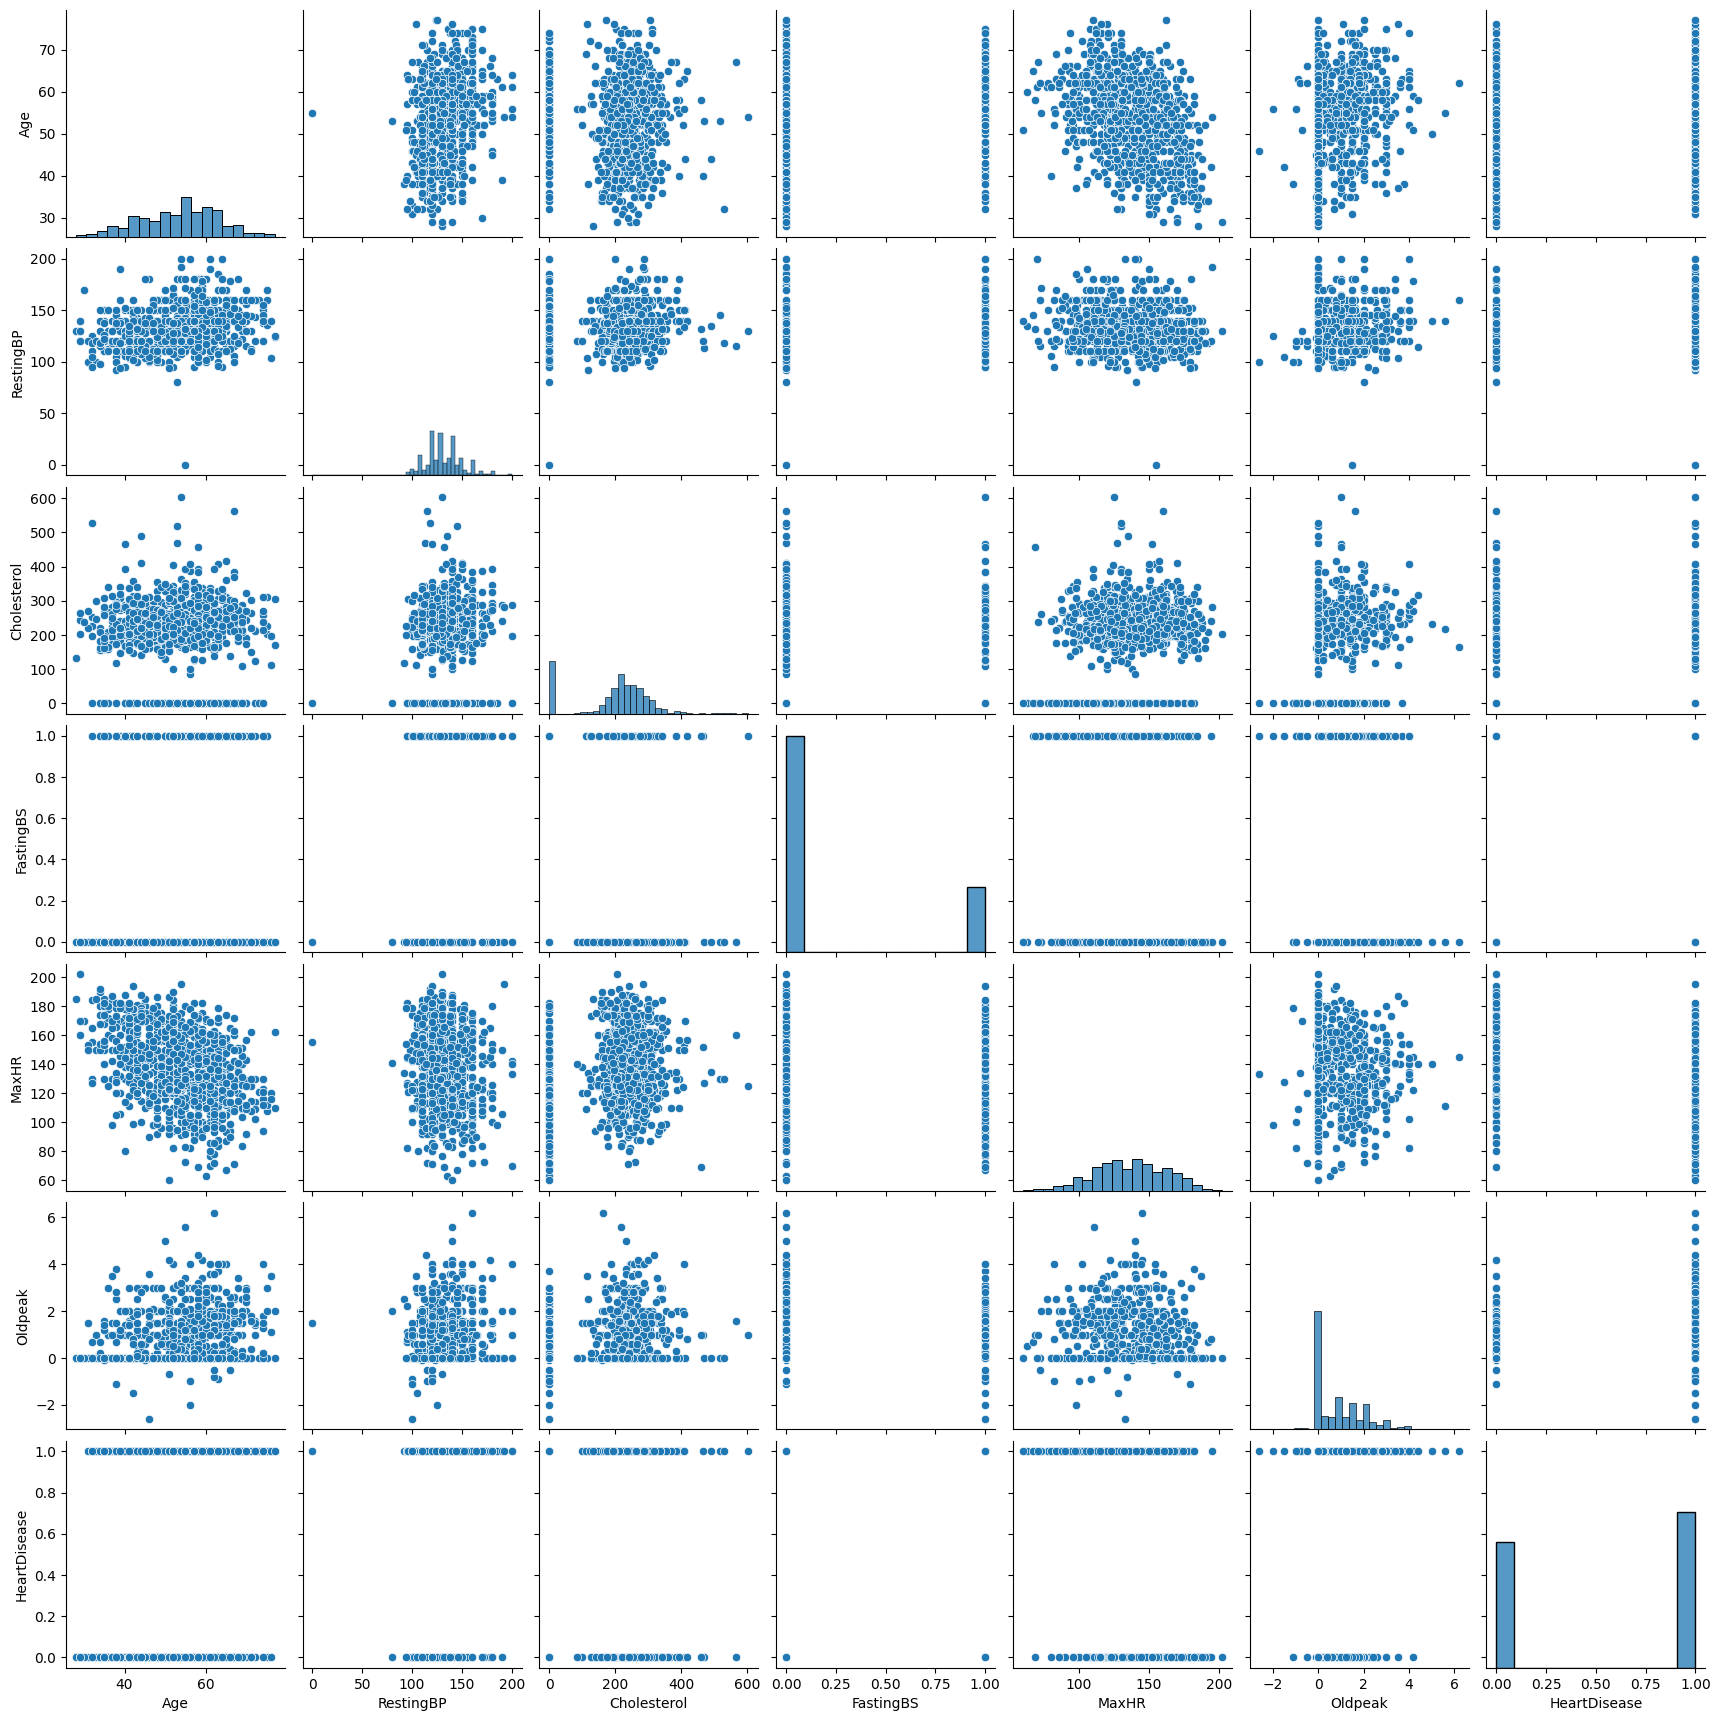

In [48]:
sns.pairplot(df)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import joblib


<Axes: >

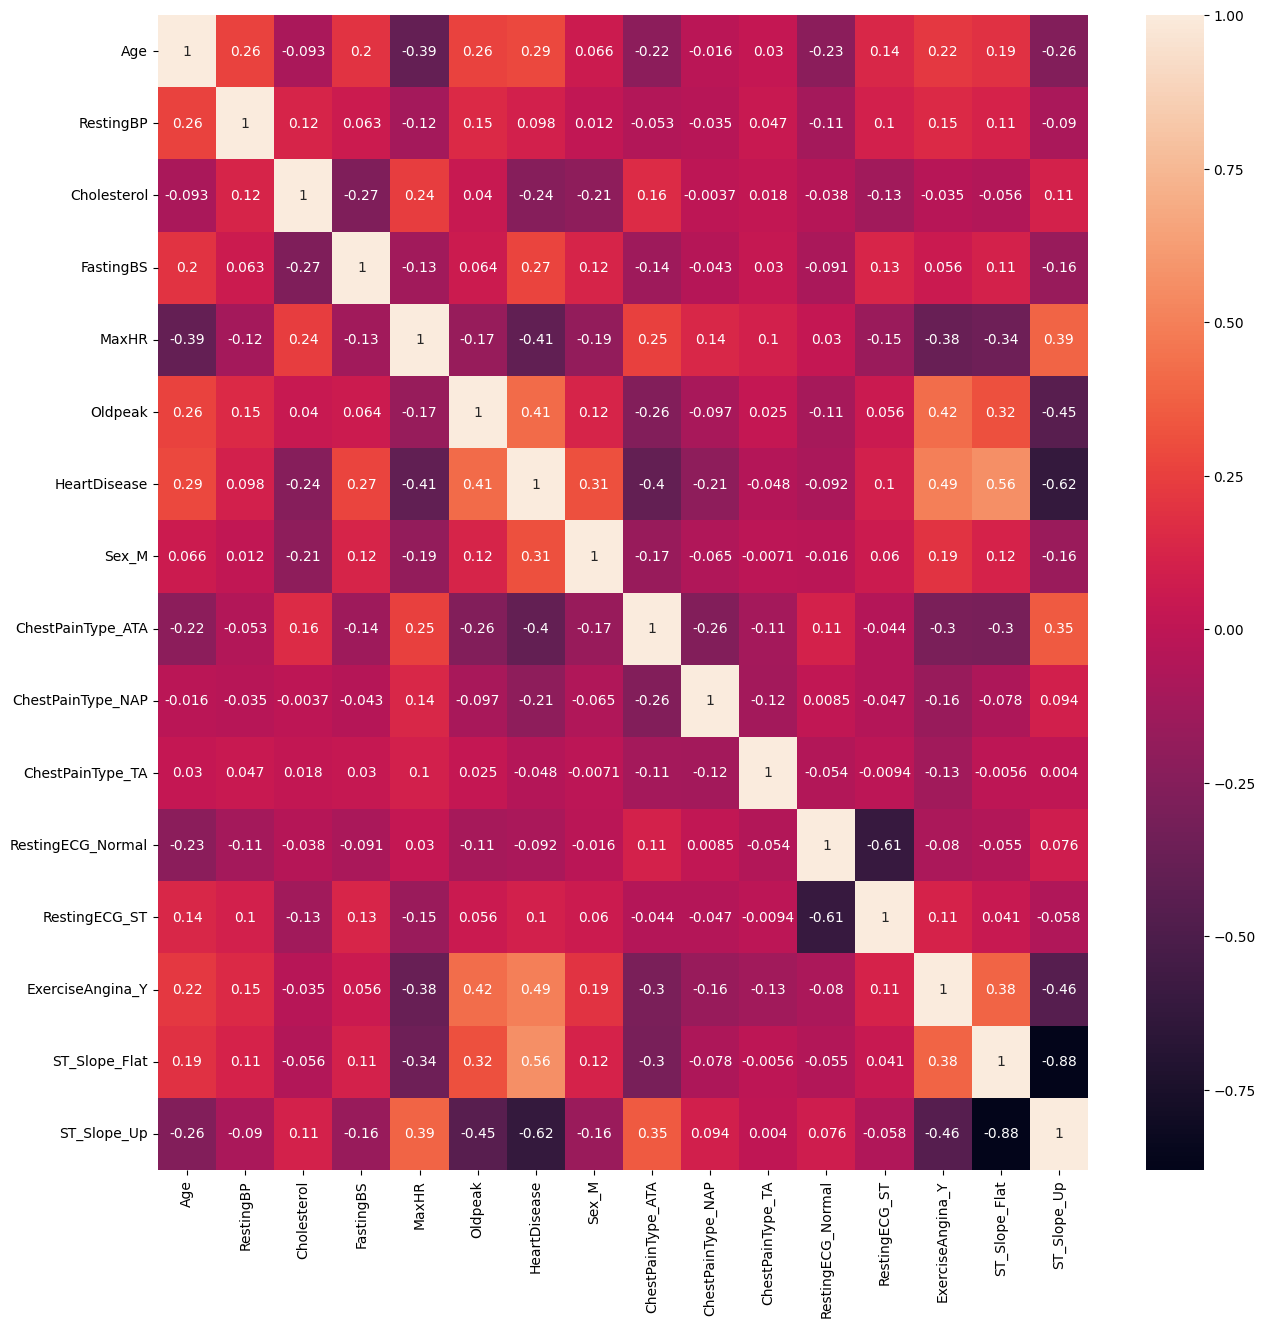

In [53]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(), annot=True)

In [57]:
X = df3.drop('HeartDisease', axis=1)
y = df3['HeartDisease']

In [81]:


# Assuming X is your feature matrix and y is your target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of classifiers
classifiers = {
    'Ada': AdaBoostClassifier(),
    'RF': RandomForestClassifier(),
    'KN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier()
}

# Create a dictionary of parameter grids
params = {
    'Ada': {
        'classifier__n_estimators': [25, 50, 100],
        'classifier__learning_rate': [1, 5, 10]
    },
    'RF': {
        'classifier__n_estimators': [25, 50, 100],
        'classifier__criterion': ['gini', 'entropy', 'log_loss'],
        'classifier__max_depth': [1, 5, 10]
    },
    'KN': {
        'classifier__n_neighbors': [5, 10, 15],
        'classifier__weights': ['uniform', 'distance']
    },
    'DT': {
        'classifier__criterion': ['gini', 'entropy', 'log_loss'],
        'classifier__max_depth': [5, 10, 15]
    }
}

best_models = {}
# Iterate through classifiers
for name, classifier in classifiers.items():
    print(name)
    
    # Create a pipeline with a scaler and a classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    # Define the parameter grid for the current classifier
    param_grid = params[name]

    # Create the GridSearchCV object with the pipeline
    grid_search = GridSearchCV(pipeline, param_grid, cv=3)

    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train.values.ravel())

    # Get the best score and parameters on the training set
    train_score = np.abs(grid_search.best_score_)
    best_params = grid_search.best_params_
    
    # Evaluate on the test set
    test_score = grid_search.score(X_test, y_test.values.ravel())
    best_models[name] = grid_search.best_estimator_
    
    print(f'Best Score for {name} on Training Set: {train_score}')
    print(f'Best Parameters for {name}: {best_params}')
    print(f'Test Set Score for {name}: {test_score}')
    
for name, model in best_models.items():
    joblib.dump(model, f'{name}_best_model.joblib')


Ada
Best Score for Ada on Training Set: 0.8488128169663439
Best Parameters for Ada: {'classifier__learning_rate': 1, 'classifier__n_estimators': 50}
Test Set Score for Ada: 0.8397790055248618
RF
Best Score for RF on Training Set: 0.8737667127708622
Best Parameters for RF: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Test Set Score for RF: 0.8784530386740331
KN
Best Score for KN on Training Set: 0.8751556016597511
Best Parameters for KN: {'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Test Set Score for KN: 0.8674033149171271
DT
Best Score for DT on Training Set: 0.8307918395573998
Best Parameters for DT: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5}
Test Set Score for DT: 0.8453038674033149


In [83]:
model = joblib.load('RF_best_model.joblib')

In [87]:
X_text = np.array([50,160,180,0,156,1.0,0,0,0,1,0,1,0,1,0])

    # Assuming your model takes X_text as input and returns predictions
predictions = model.predict(X_text.reshape(1, -1))

predictions

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])